<a href="https://colab.research.google.com/github/catuscio/DeepLearning-Basic/blob/main/LogisticRegression_forStudent_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 모두의 딥러닝 스터디 3주차 로지스틱 회귀 실습문제
- 스터디에서 진행한 발표 내용을 참고해서 클론 코딩!
- 모르는 내용을 구글링해서 주석으로 적기!
- 클론 코딩하고 나만의 주석 적는 것이 실습

## 로지스틱 회귀
- digits dataset을 활용한 로지스틱 회귀 및 시각화

In [ ]:
#install scikit-learn
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=7e3bfca6e0ec6ec0dddd7bfad26e6a294701b9ca04f4f86fa2c8d30d08917f03
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
#data 시각화
%matplotlib inline

#load and return dataset
from sklearn.datasets import load_digits
digits = load_digits()

#학습(train)을 위한 데이터 출력
print("Image Data Shape", digits.data.shape)

#검증(test)을 위한 데이터 출력
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


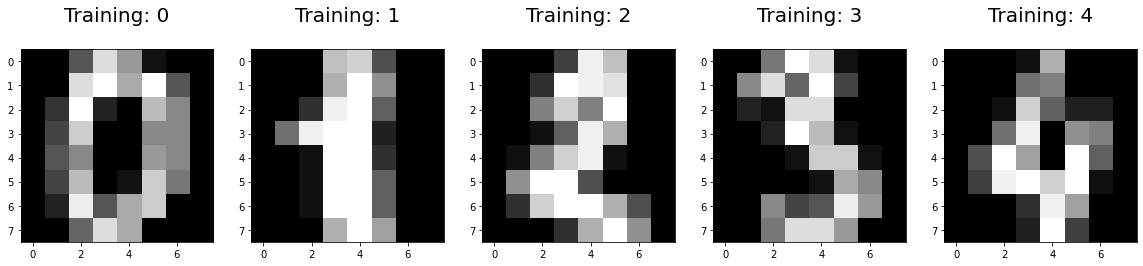

In [ ]:
#visualization
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n'% label, fontsize=20)

In [ ]:
#dataset 분류
from sklearn.model_selection import train_test_split  #dataset split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

#logistic regression(이하 회귀 과정)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logisticRegr.predict(x_test[0].reshape(1, -1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
#인풋 아웃풋 대입 후 예측값 출력
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


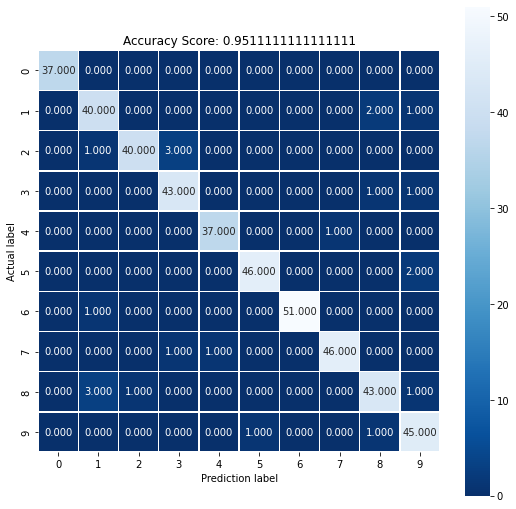

In [ ]:
import seaborn as sns     #color
from sklearn import metrics   #행렬 양식

#시각화
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Prediction label')
all_sample_title = "Accuracy Score: {}".format((score))
plt.title(all_sample_title)
plt.show()